In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np

In [3]:
data = pd.read_csv('Datasets/MailDatasetNaiveBayes.csv', encoding='cp437')
data.head()

,Unnamed: 0,Content,Type
0,0,Subject: key hr issues going forward\r\na ) ye...,1
1,1,Subject: congrats !\r\ncontratulations on the ...,1
2,2,Subject: re : key hr issues going forward\r\na...,1
3,3,Subject: epmi files protest of entergy transco...,1
4,4,Subject: california power 2 / 8\r\nplease cont...,1


In [4]:
x = data['Content']
x = x.str.lower().str.strip()
x.head()

0    subject: key hr issues going forward\r\na ) ye...
1    subject: congrats !\r\ncontratulations on the ...
2    subject: re : key hr issues going forward\r\na...
3    subject: epmi files protest of entergy transco...
4    subject: california power 2 / 8\r\nplease cont...
Name: Content, dtype: object

In [5]:
y = data['Type']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.20, random_state=42)

In [7]:
vec = CountVectorizer()
x_train = vec.fit_transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()

In [8]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [9]:
model.score(x_test, y_test)

0.9891205802357208

In [10]:
y_pred = model.predict(x_test)

confu = confusion_matrix(y_test, y_pred)
print(confu)

[[292   8]
 [  4 799]]


In [11]:
print("Accuracy Score : "+ str(accuracy_score(y_test, y_pred)))

Accuracy Score : 0.9891205802357208


In [12]:
print("Recall Score : "+ str(recall_score(y_test, y_pred)))

Recall Score : 0.9950186799501868


In [13]:
print("Precision Score : "+ str(precision_score(y_test, y_pred)))

Precision Score : 0.990086741016109


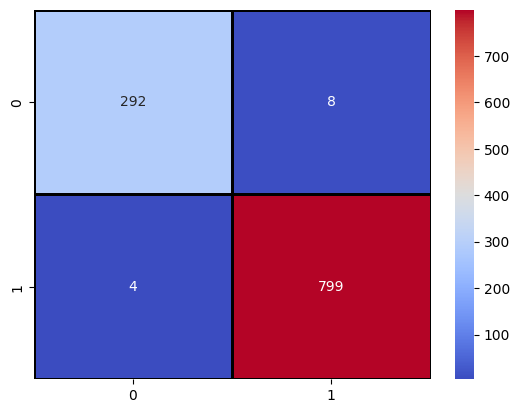

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confu, cmap='coolwarm', annot=True, linewidths=2, linecolor='black', fmt="d")
plt.show()